In [9]:
import pandas as pd
from datetime import datetime

# Read your CSV
df = pd.read_csv("expensedata.csv")

# Expense class 
class Expense:
    def __init__(self, date, account, category, note, amount, income_or_expense, currency):
        self.date = datetime.strptime(date, "%Y-%m-%d %H:%M:%S")
        self.account = account
        self.category = category
        self.note = note
        self.amount = float(amount)
        self.income_or_expense = income_or_expense
        self.currency = currency

    def __repr__(self):
        return f"<{self.date.date()} | {self.category} | {self.note} | {self.amount}>"

# ExpenseAnalyzer class 
class ExpenseAnalyzer:
    def __init__(self, expenses):
        self.expenses = [e for e in expenses if e.income_or_expense.lower() == 'expense']

    def total_spends_per_month(self):
        result = {}
        for exp in self.expenses:
            month = exp.date.strftime("%Y-%m")
            result[month] = result.get(month, 0) + exp.amount
        return result

    def top_categories_by_spend(self, top_n=5):
        category_totals = {}
        for exp in self.expenses:
            category_totals[exp.category] = category_totals.get(exp.category, 0) + exp.amount
        sorted_totals = sorted(category_totals.items(), key=lambda x: x[1], reverse=True)
        return sorted_totals[:top_n]

    def average_amount_per_vendor(self):
        vendor_totals = {}
        vendor_counts = {}
        for exp in self.expenses:
            vendor = exp.note
            vendor_totals[vendor] = vendor_totals.get(vendor, 0) + exp.amount
            vendor_counts[vendor] = vendor_counts.get(vendor, 0) + 1
        average_per_vendor = {
            vendor: vendor_totals[vendor] / vendor_counts[vendor]
            for vendor in vendor_totals
        }
        return average_per_vendor

# Converting DataFrame to list of Expense objects
expense_list = []
for _, row in df.iterrows():
    expense = Expense(
        date=row['Date'],
        account=row['Account'],
        category=row['Category'],
        note=row['Note'],
        amount=row['INR'],
        income_or_expense=row['Income/Expense'],
        currency=row['Currency']
    )
    expense_list.append(expense)

# print
analyzer = ExpenseAnalyzer(expense_list)

print(" \n Total spends per month:", analyzer.total_spends_per_month())
print(" \n Top categories:", analyzer.top_categories_by_spend())
print(" \n Avg amount per vendor:", analyzer.average_amount_per_vendor())


 
 Total spends per month: {'2022-03': 525.0, '2022-02': 17864.65, '2022-01': 20679.51, '2021-12': 16334.44, '2021-11': 3620.4}
 
 Top categories: [('Food', 24502.480000000003), ('Household', 12188.0), ('Transportation', 9203.8), ('Other', 5117.0), ('Apparel', 3388.0)]
 
 Avg amount per vendor: {'Brownie': 50.0, 'To lended people': 300.0, 'Dinner': 170.28636363636363, 'Metro': 45.0, 'Snacks': 83.3, 'Pizza': 320.45, 'Lunch': 223.33333333333334, 'No Note': 515.25, 'To karthi': 100.0, 'Tea lights': 84.0, 'Creamstone': 289.0, 'Tamen': 324.7, 'Hoodie for gobi': 399.0, 'Eggs': 83.0, 'Earphone': 399.0, 'Auto to laxmi mills': 120.0, 'It better be worth it': 1300.0, 'Travel to koyambedu': 138.0, 'Stuffs': 336.0, 'Train cbe to chn': 201.8, 'Random stuff for drinks': 111.0, 'Bus ticket': 1575.0, 'Took from sbi': 200.0, 'Ramen with gobi': 380.0, 'To auto anna': 50.0, 'To egmore': 270.0, 'Kfc dinner': 494.5, 'Side dishes': 165.0, 'Kfc ': 475.0, 'Games ': 100.0, 'Dinner with aravind and buddies': 49

In [3]:
print(df)

                    Date               Account        Category  \
0    2022-03-02 10:11:00  CUB - online payment            Food   
1    2022-03-02 10:11:00  CUB - online payment           Other   
2    2022-03-01 19:50:00  CUB - online payment            Food   
3    2022-03-01 18:56:00  CUB - online payment  Transportation   
4    2022-03-01 18:22:00  CUB - online payment            Food   
..                   ...                   ...             ...   
272  2021-11-22 14:16:00  CUB - online payment            Food   
273  2021-11-22 14:16:00  CUB - online payment            Food   
274  2021-11-21 17:07:00  CUB - online payment  Transportation   
275  2021-11-21 15:50:00  CUB - online payment            Food   
276  2021-11-21 13:30:00  CUB - online payment           Other   

                   Note     INR Income/Expense Currency  
0               Brownie    50.0        Expense      INR  
1      To lended people   300.0        Expense      INR  
2                Dinner    78.0  

In [10]:
#plots

import matplotlib.pyplot as plt
import seaborn as sns


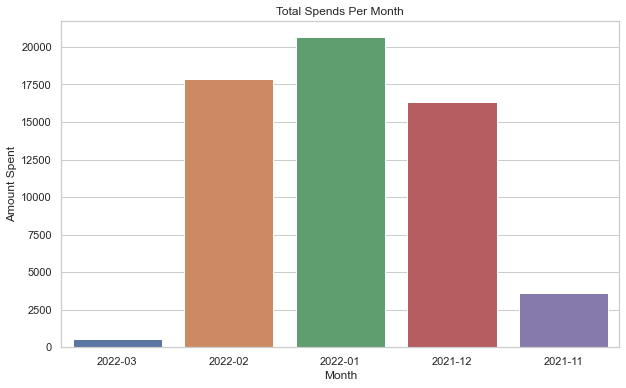

In [18]:
#Total spends per month 

monthly_spends = analyzer.total_spends_per_month()

months = list(monthly_spends.keys())
amounts = list(monthly_spends.values())

plt.figure(figsize=(10, 6))
sns.barplot(x=months, y=amounts)
plt.title("Total Spends Per Month")
plt.xlabel("Month")
plt.ylabel("Amount Spent")
plt.show()


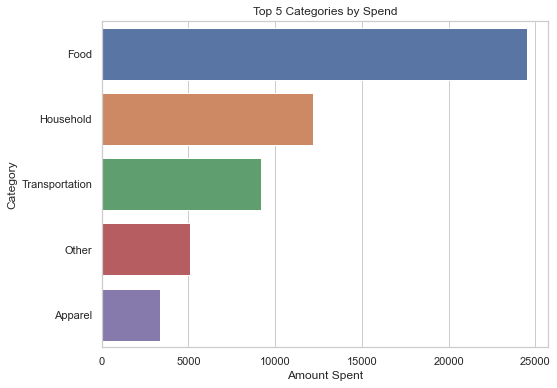

In [19]:
#Top categories by spend 
top_categories = analyzer.top_categories_by_spend(top_n=5)

categories = [cat[0] for cat in top_categories]
amounts = [cat[1] for cat in top_categories]

plt.figure(figsize=(8, 6))
sns.barplot(x=amounts, y=categories)
plt.title("Top 5 Categories by Spend")
plt.xlabel("Amount Spent")
plt.ylabel("Category")
plt.show()


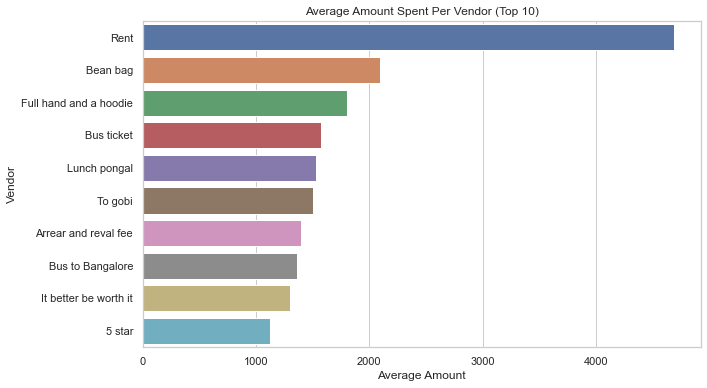

In [20]:
#Average amount spent per vendor 
avg_vendor = analyzer.average_amount_per_vendor()

# Limit to top 10 
top_vendors = sorted(avg_vendor.items(), key=lambda x: x[1], reverse=True)[:10]
vendors = [v[0] for v in top_vendors]
avg_amounts = [v[1] for v in top_vendors]

plt.figure(figsize=(10, 6))
sns.barplot(x=avg_amounts, y=vendors)
plt.title("Average Amount Spent Per Vendor (Top 10)")
plt.xlabel("Average Amount")
plt.ylabel("Vendor")
plt.show()
